In [1]:
from keras import models
from keras import layers
from keras.applications import VGG16
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda
import tensorflow as tf
import pandas as pd
import plotly.express as px
import plotly.io as pio

Using TensorFlow backend.


In [2]:
train = pd.read_csv('./csvs/clean.csv',error_bad_lines=False)
train.head()

,state,country,lat,long,date,confirmed,death,recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [3]:
# cases in the dataset
cases = ['confirmed', 'death', 'recovered','active']

# finding out active cases confirmed - death - recovered
train['active'] = train['confirmed'] - train['death']- train['recovered']

train['country'] = train['country'].replace('Mainland China', 'China')

train[['state']] = train[['state']].fillna('')

train[cases] = train[cases].fillna('')

train['date']= pd.to_datetime(train['date'])


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19018 entries, 0 to 19017
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   state      19018 non-null  object        
 1   country    19018 non-null  object        
 2   lat        19018 non-null  float64       
 3   long       19018 non-null  float64       
 4   date       19018 non-null  datetime64[ns]
 5   confirmed  19018 non-null  int64         
 6   death      19018 non-null  int64         
 7   recovered  19018 non-null  int64         
 8   active     19018 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 1.3+ MB


In [5]:
# data of how many days
print("The dataset contains data of : ")
print(train['date'].max() - train['date'].min())

# Earliest entry
print("Lowest date : ")
print(train['date'].min())

# last entry
print("Highest date : ")
print(train['date'].max())


The dataset contains data of : 
73 days 00:00:00
Lowest date : 
2020-01-22 00:00:00
Highest date : 
2020-04-04 00:00:00


C:\Users\ASUS\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



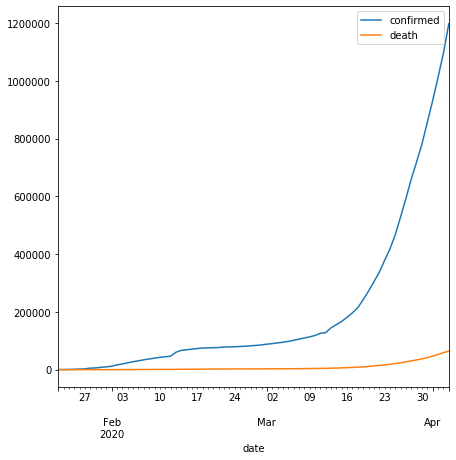

In [6]:
import matplotlib.pyplot as plt
import numpy as np

#plot data
fig, ax = plt.subplots(figsize=(7,7))
train.groupby('date')['date','confirmed','death'].sum().plot(ax=ax)

In [52]:
t = train[train['date'] == max(train['date'])]
fig = t.groupby('country')['confirmed','death', 'recovered','active'].sum().reset_index()


fig['mortality'] = round((fig['death']/fig['confirmed'] * 100),2)

temp = fig[fig['confirmed']>1000]
temp = temp.sort_values('mortality',ascending=False)

fig = px.bar(temp.sort_values(by='mortality',ascending=False)[:10][::-1],
            x='mortality',
            y='country',
            title='Death Per 1000 Confirmed Cases',
             text='mortality', height=600,
            orientation='h',
            color_discrete_sequence=['green'])

fig.show()

C:\Users\ASUS\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [8]:
df = pd.read_csv('./csvs/temperature_dataframe.csv',error_bad_lines=False)

df.head()

,Unnamed: 0,id,state,country,lat,long,date,cases,fatalities,capital,humidity,sunHour,tempC,windspeedKmph
0,0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0,0,Kabul,65.0,8.7,-1.0,8.0
1,1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0,0,Kabul,59.0,8.7,-3.0,8.0
2,2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0,0,Kabul,71.0,7.1,0.0,7.0
3,3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0,0,Kabul,79.0,8.7,0.0,7.0
4,4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0,0,Kabul,64.0,8.7,-1.0,8.0


In [9]:
df['country'] = df['country'].replace('USA','US')
df['country'] = df['country'].replace('UK','United Kingdom')

df = df[['country','state','date','humidity','tempC','sunHour','windspeedKmph']].reset_index()
df.head()

,index,country,state,date,humidity,tempC,sunHour,windspeedKmph
0,0,Afghanistan,NaN,2020-01-22,65.0,-1.0,8.7,8.0
1,1,Afghanistan,NaN,2020-01-23,59.0,-3.0,8.7,8.0
2,2,Afghanistan,NaN,2020-01-24,71.0,0.0,7.1,7.0
3,3,Afghanistan,NaN,2020-01-25,79.0,0.0,8.7,7.0
4,4,Afghanistan,NaN,2020-01-26,64.0,-1.0,8.7,8.0


In [10]:
df['date'] = pd.to_datetime(df['date'])
df['state'] = df['state'].fillna('')
df.head()

,index,country,state,date,humidity,tempC,sunHour,windspeedKmph
0,0,Afghanistan,,2020-01-22,65.0,-1.0,8.7,8.0
1,1,Afghanistan,,2020-01-23,59.0,-3.0,8.7,8.0
2,2,Afghanistan,,2020-01-24,71.0,0.0,7.1,7.0
3,3,Afghanistan,,2020-01-25,79.0,0.0,8.7,7.0
4,4,Afghanistan,,2020-01-26,64.0,-1.0,8.7,8.0


In [48]:
merged_data = train.merge(df, on=['country','date','state'], how='inner')
merged_data

,state,country,lat,long,date,confirmed,death,recovered,active,index,humidity,tempC,sunHour,windspeedKmph
0,,Afghanistan,33.000000,65.000000,2020-01-22,0,0,0,0,0,65.0,-1.0,8.7,8.0
1,,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,60,51.0,11.0,7.0,3.0
2,,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,120,50.0,19.0,10.5,16.0
3,,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,180,98.0,0.0,3.5,7.0
4,,Argentina,-38.416100,-63.616700,2020-01-22,0,0,0,0,300,61.0,33.0,10.5,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11813,,Uzbekistan,41.377500,64.585300,2020-03-21,43,0,0,43,16496,63.0,18.0,6.1,8.0
11814,,Venezuela,6.423800,-66.589700,2020-03-21,70,0,0,70,16556,75.0,25.0,8.8,6.0
11815,,Vietnam,16.000000,108.000000,2020-03-21,94,0,17,77,16616,81.0,30.0,8.9,12.0
11816,,Zambia,-15.416700,28.283300,2020-03-21,2,0,0,2,16676,85.0,21.0,7.4,9.0


In [12]:
training_data = merged_data

training_data = training_data.drop(['country','active','recovered','state','lat','long','date','index'],axis=1).dropna()

In [50]:
training_data.tail()

,confirmed,death,humidity,tempC,sunHour,windspeedKmph
11813,43,0,63.0,18.0,6.1,8.0
11814,70,0,75.0,25.0,8.8,6.0
11815,94,0,81.0,30.0,8.9,12.0
11816,2,0,85.0,21.0,7.4,9.0
11817,0,0,52.0,18.0,11.6,8.0


In [14]:
X = training_data.drop(['confirmed','death'], axis=1)
y = training_data[['confirmed','death']]

In [15]:
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeRegressor

X_train, X_val, y_train, y_val = tts(X,y, test_size=0.2, shuffle=True, random_state=42)

In [16]:
model_infected = DecisionTreeRegressor(random_state=42, criterion='mae')

model_deaths = DecisionTreeRegressor(random_state=42, criterion='mae')


In [17]:
model_infected = model_infected.fit(X,y['confirmed'])
model_deaths = model_deaths.fit(X,y['death'])

['Temparature', 'Hummidity', 'SunHour', 'windspreed(Kmph)']
[39.71151118 39.31182774 11.26314235  9.71351872]


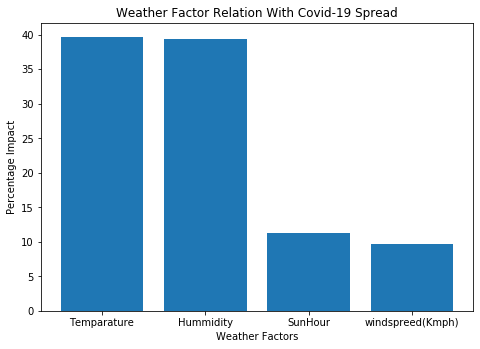

In [57]:
# now, plotting the feature extracted from confirmed cases
# percentage importance of factors


infected_importance = model_infected.feature_importances_
infected_indices = np.argsort(infected_importance)[::-1]


x1=['Temparature','Hummidity','SunHour','windspreed(Kmph)']
y1=infected_importance[infected_indices]*100

print(x1)
print(y1)

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x1,y1)
plt.title('Weather Factor Relation With Covid-19 Spread')
plt.xlabel('Weather Factors')
plt.ylabel('Percentage Impact')
plt.show()


['Temparature', 'Hummidity', 'SunHour', 'windspreed(Kmph)']
[43.89071038 42.99453552  9.98907104  3.12568306]


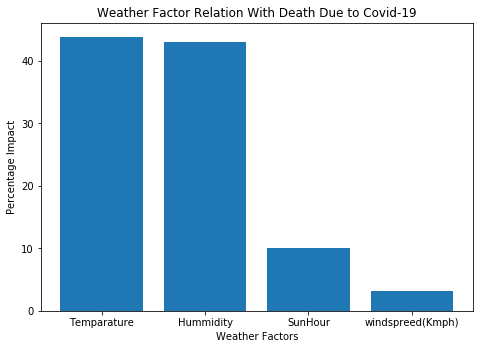

In [56]:
# now, plotting the feature extracted from confirmed cases
# percentage importance of factors


infected_importance = model_deaths.feature_importances_
infected_indices = np.argsort(infected_importance)[::-1]




x1=['Temparature','Hummidity','SunHour','windspreed(Kmph)']
y1=infected_importance[infected_indices]*100

print(x1)
print(y1)

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x1,y1)
plt.title('Weather Factor Relation With Death Due to Covid-19')
plt.xlabel('Weather Factors')
plt.ylabel('Percentage Impact')
plt.show()